## Autoregressive integrated moving average - `arima`

**Reference(s):**
- https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average


- Non-seasonal ARIMA models are generally denoted $ARIMA(p,d,q)$ where parameters $p$, $d$, and $q$ are non-negative integers,
    - $p$ is the order (number of time lags) of the autoregressive model,
    - $d$ is the degree of differencing (the number of times the data have had past values subtracted)
    - $q$ is the order of the moving-average model.


- Seasonal ARIMA models are usually denoted $ARIMA(p,d,q)(P,D,Q)_{m}$, where
    - $m$ refers to the number of periods in each season
    - the uppercase $P$,$D$,$Q$ refer to the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model.

### $ARMA(p',q)$ model

\begin{equation}
    X_{t} - \alpha_{1} X_{t-1} - ... \alpha_{p'} X_{t-p'}
    =
    \epsilon_{t} +
    \theta_{1} \epsilon_{t-1} +
    + ...
    + \theta_{q} \epsilon_{t-q}
\end{equation}

\begin{equation}
    \left( 1 - \sum_{i=1}^{p'} \alpha_{i} L^{i} \right) X_{t}
    =
    \left( 1 + \sum_{i=1}^{q} \theta_{i} L^{i} \right) \epsilon_{t}
\end{equation}

~~~~
arima.sim(model, n, rand.gen = rnorm, innov = rand.gen(n, ...),
          n.start = NA, start.innov = rand.gen(n.start, ...),
          ...)
~~~~


- `model`
A list with component ar and/or ma giving the AR and MA coefficients respectively. Optionally a component order can be used. An empty list gives an ARIMA(0, 0, 0) model, that is white noise.

- `n`
length of output series, before un-differencing. A strictly positive integer.

- `rand.gen`	
optional: a function to generate the innovations.

- `innov`
an optional times series of innovations. If not provided, rand.gen is used.

- `n.start`
length of ‘burn-in’ period. If NA, the default, a reasonable value is computed.

- `start.innov`
an optional times series of innovations to be used for the burn-in period. If supplied there must be at least n.start values (and n.start is by default computed inside the function).

...	
additional arguments for rand.gen. Most usefully, the standard deviation of the innovations generated by rnorm can be specified by sd.

In [1]:
?arima.sim

In [2]:
white_noise <- arima.sim(model = list(order = c(0, 0, 0)), n = 100)

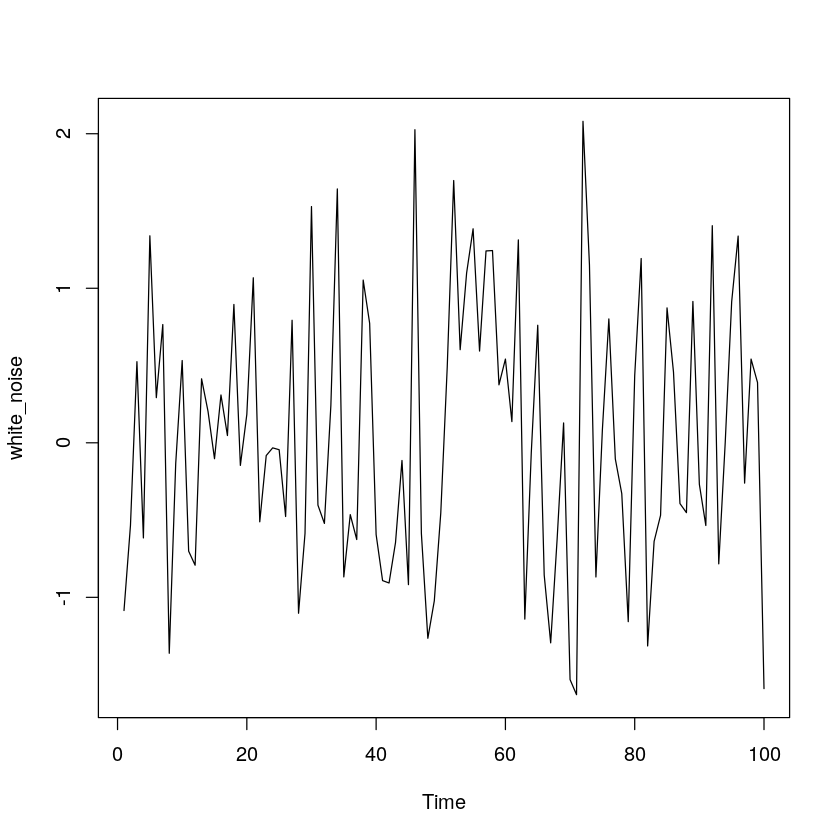

In [3]:
ts.plot(white_noise)

In [4]:
white_noise_2 <- arima.sim(model = list(order = c(0, 0, 0)), mean=100, sd=10, n = 100)

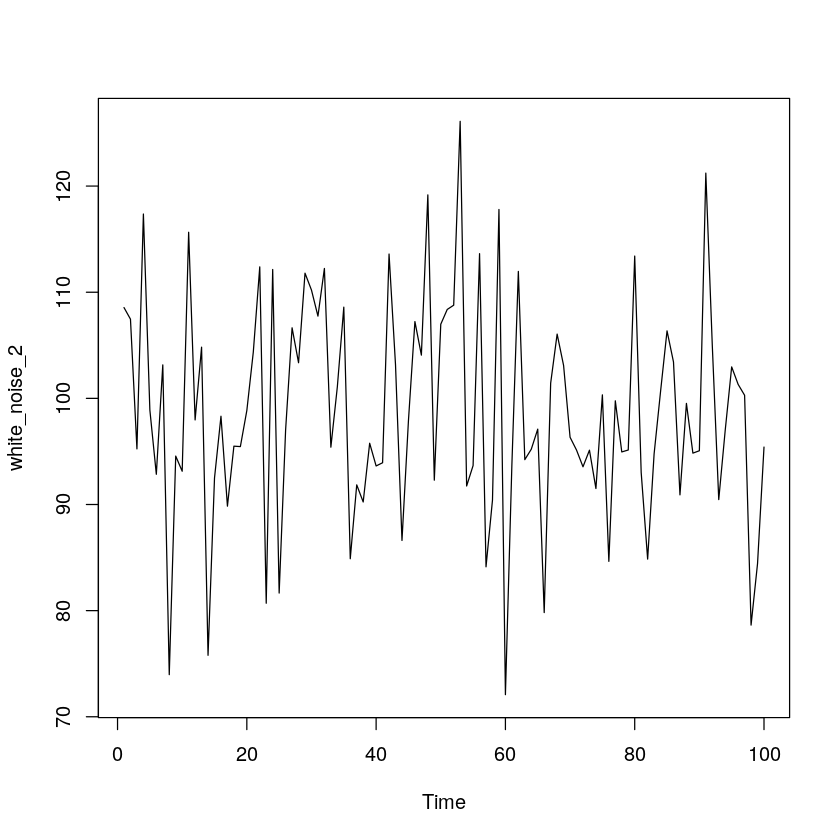

In [5]:
ts.plot(white_noise_2)

### Fitting ARIMA

In [6]:
?arima

Fit an ARIMA model to a univariate time series.

~~~~
arima(x, order = c(0L, 0L, 0L),
      seasonal = list(order = c(0L, 0L, 0L), period = NA),
      xreg = NULL, include.mean = TRUE,
      transform.pars = TRUE,
      fixed = NULL, init = NULL,
      method = c("CSS-ML", "ML", "CSS"), n.cond,
      SSinit = c("Gardner1980", "Rossignol2011"),
      optim.method = "BFGS",
      optim.control = list(), kappa = 1e6)
~~~~

In [7]:
fit = arima(x=white_noise_2, order=c(0,0,0))
fit


Call:
arima(x = white_noise_2, order = c(0, 0, 0))

Coefficients:
      intercept
        98.6577
s.e.     1.0443

sigma^2 estimated as 109.1:  log likelihood = -376.49,  aic = 756.98

In [8]:
mean(white_noise_2)

[1] 98.65766

In [9]:
var(white_noise_2)

[1] 110.1633

## Randowm Walk model

#### Random walk

\begin{equation}
    X_{t} = X_{t-1} + c + \epsilon
\end{equation}

where:
- $\epsilon \sim N(0,\sigma^{2}_{\epsilon})$
- $c$: drift term

parameters of the model:
- $\sigma^{2}_{\epsilon}$
- $c$

#### First order diff

\begin{equation}
    dX = X_{t} - X_{t-1} = c + \epsilon 
\end{equation}

### Example(s)

#### Random walk without drift

In [10]:
random_walk <- arima.sim(model=list(order=c(0,1,0)), n=500)

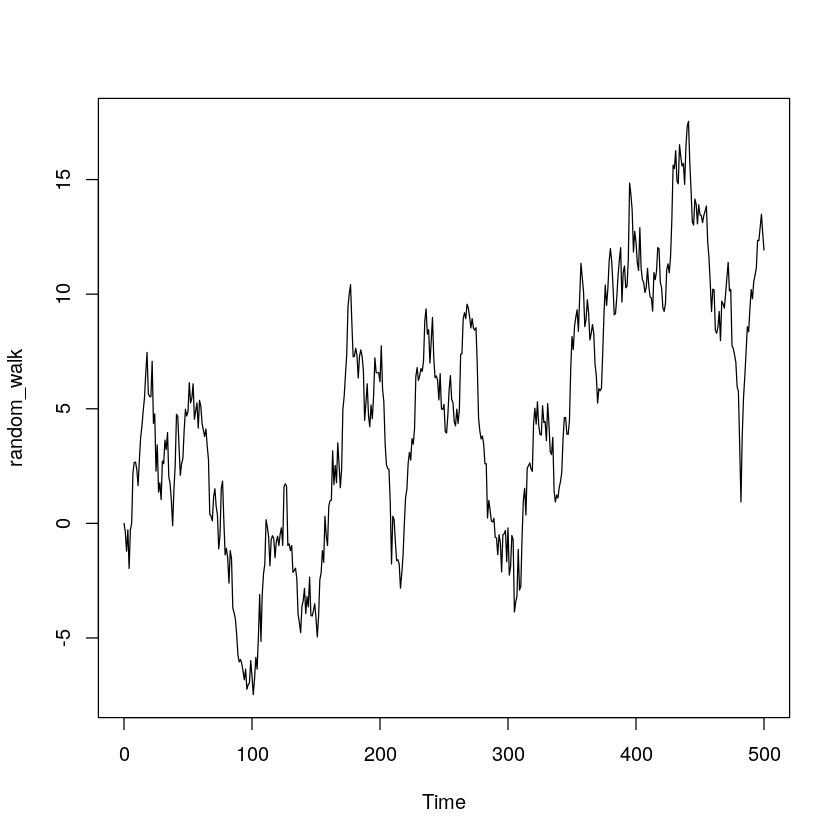

In [11]:
ts.plot(random_walk)

In [12]:
random_walk_diff = diff(random_walk)

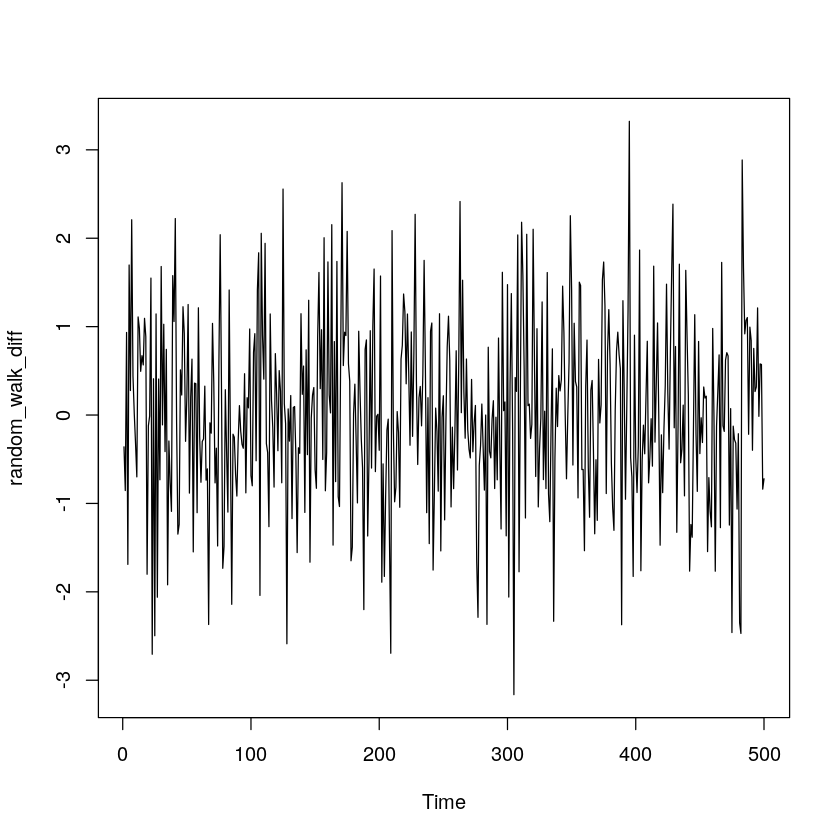

In [13]:
ts.plot(random_walk_diff)

#### Random walk with drift

In [14]:
rw_drift <- arima.sim(model = list(order = c(0, 1, 0)), n = 100, mean = 1)

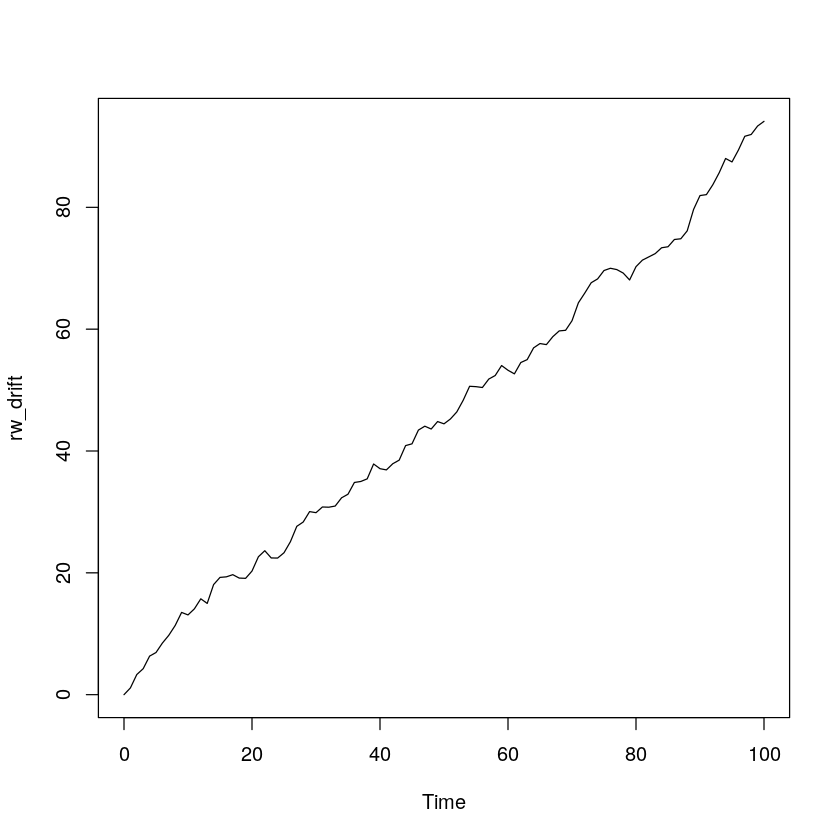

In [15]:
ts.plot(rw_drift)

In [16]:
rw_drift_diff = diff(rw_drift)

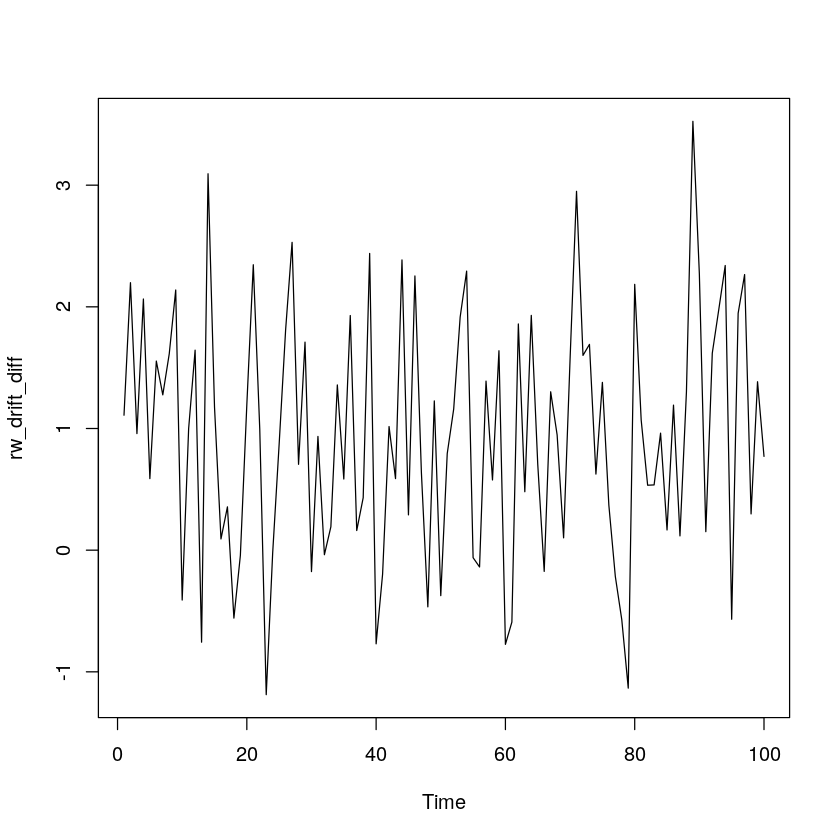

In [17]:
ts.plot(rw_drift_diff)

### Estimate the random walk model

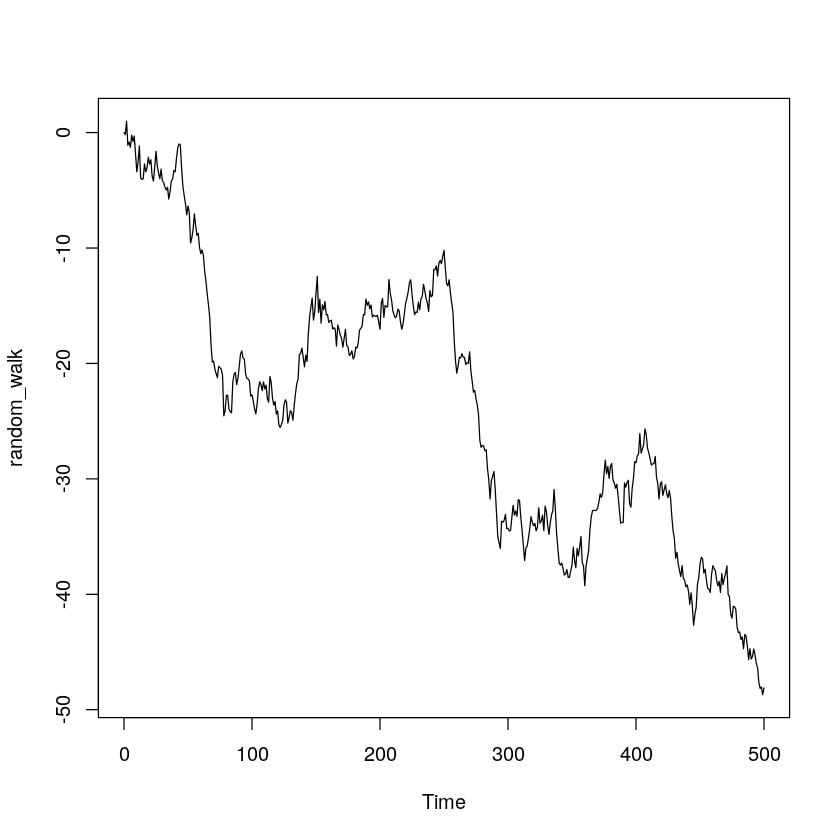

In [18]:
random_walk <- arima.sim(model=list(order=c(0,1,0)), n=500)
ts.plot(random_walk)

In [36]:
model_rw <- arima(rw_drift_diff, order=c(0,0,0))
model_rw


Call:
arima(x = rw_drift_diff, order = c(0, 0, 0))

Coefficients:
      intercept
         0.9412
s.e.     0.1007

sigma^2 estimated as 1.015:  log likelihood = -142.63,  aic = 289.25

In [30]:
str(model_rw)

List of 14
 $ coef     : num(0) 
 $ sigma2   : num 0.995
 $ var.coef : num(0) 
 $ mask     : logi(0) 
 $ loglik   : num -708
 $ aic      : num 1418
 $ arma     : int [1:7] 0 0 0 0 1 1 0
 $ residuals: Time-Series [1:501] from 0 to 500: 0 -0.177 1.153 -2.067 0.264 ...
 $ call     : language arima(x = random_walk, order = c(0, 1, 0))
 $ series   : chr "random_walk"
 $ code     : num 0
 $ n.cond   : int 0
 $ nobs     : int 500
 $ model    :List of 10
  ..$ phi  : num(0) 
  ..$ theta: num(0) 
  ..$ Delta: num 1
  ..$ Z    : num [1:2] 1 1
  ..$ a    : num [1:2] 0.582 -48.696
  ..$ P    : num [1:2, 1:2] 0.00 -7.42e-23 -7.42e-23 7.42e-23
  ..$ T    : num [1:2, 1:2] 0 1 0 1
  ..$ V    : num [1:2, 1:2] 1 0 0 0
  ..$ h    : num 0
  ..$ Pn   : num [1:2, 1:2] 1.00 0.00 0.00 7.42e-23
 - attr(*, "class")= chr "Arima"


In [37]:
int_rw <- model_rw$coef

In [38]:
int_rw

intercept 
0.9411685

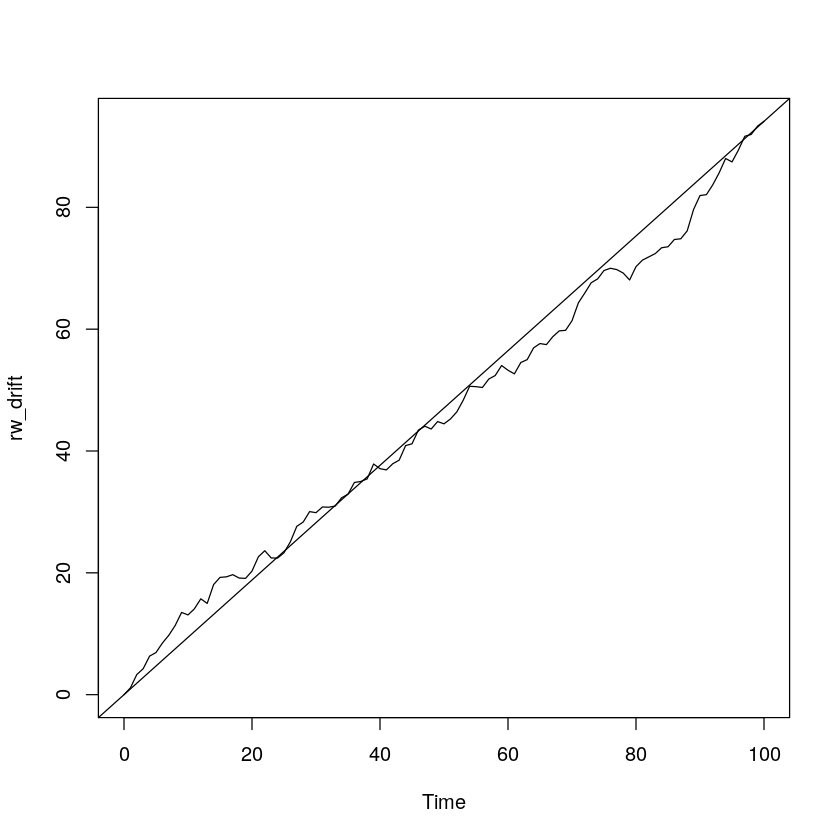

In [41]:
ts.plot(rw_drift)
abline(0, int_rw)